In [1]:
import numpy as np
import matplotlib.pylab as plt
from lsst.sims.featureScheduler.utils import schema_converter

In [2]:
sc = schema_converter()

In [3]:
krak = sc.opsim2obs('kraken_2026.db')

In [4]:
slair = sc.opsim2obs('blob_10.db')

In [5]:
for filtername in ['u', 'g', 'r', 'i', 'z', 'y']:
    gk = np.where((krak['filter'] == filtername) & (krak['sunAlt'] < np.radians(-18.)))
    gs = np.where((slair['filter'] == filtername) & (slair['sunAlt'] < np.radians(-18.)))
    mk = np.median(krak['fivesigmadepth'][gk])
    ms = np.median(slair['fivesigmadepth'][gs])
    print(mk, ms, ms-mk)

23.2915393645 23.369229025 0.0776896605797
24.6169524277 24.6661165512 0.0491641235077
24.2369004 24.2345406701 -0.00235972992773
23.6619606154 23.6879259513 0.0259653358954
22.7865099 22.9119428495 0.125432949584
22.0021037144 22.1135404211 0.111436706686


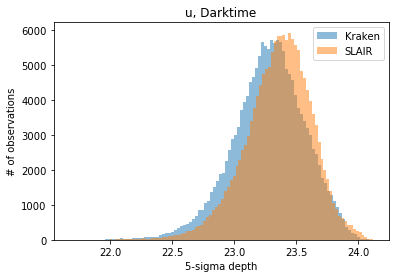

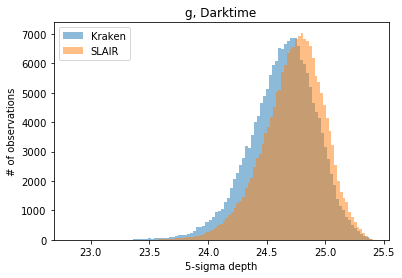

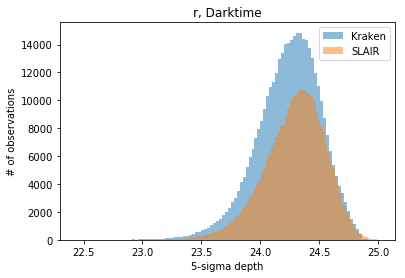

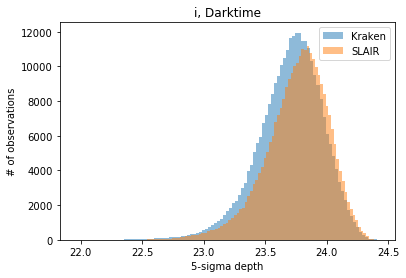

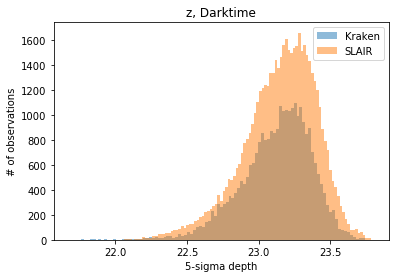

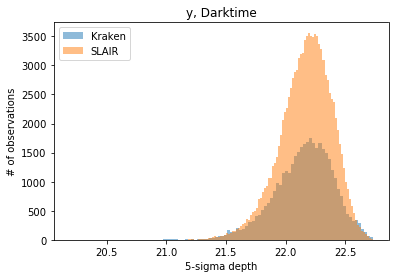

In [6]:
for filtername in ['u', 'g', 'r', 'i', 'z', 'y']:
    plt.figure()
    gk = np.where((krak['filter'] == filtername) & (krak['sunAlt'] < np.radians(-18.)) & (krak['moonAlt'] < 0))
    gs = np.where((slair['filter'] == filtername) & (slair['sunAlt'] < np.radians(-18.))& (slair['moonAlt'] < 0))

    val, bins, patches = plt.hist(krak['fivesigmadepth'][gk], bins=100, alpha=0.5, label='Kraken')
    val, bins, patches =  plt.hist(slair['fivesigmadepth'][gs], bins=100, alpha=0.5, label='SLAIR')
    plt.xlabel('5-sigma depth')
    plt.ylabel('# of observations')
    plt.title('%s, Darktime' % filtername)
    plt.legend()
    plt.savefig('%s_comp.pdf' % filtername)

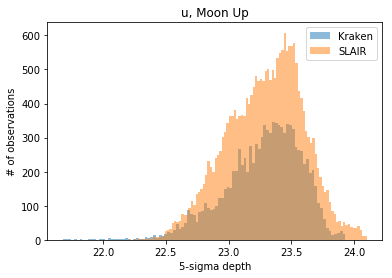

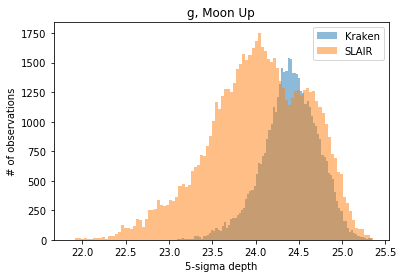

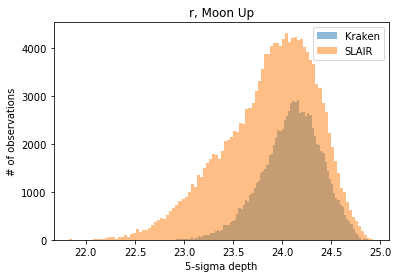

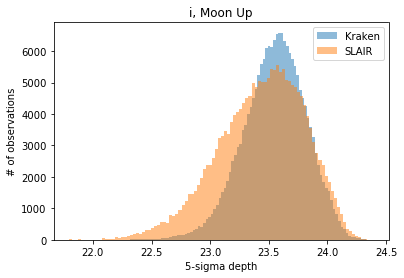

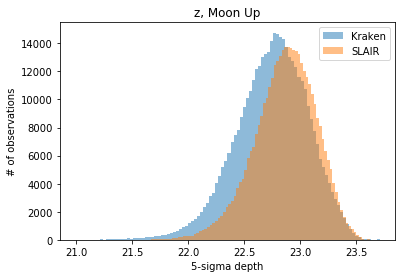

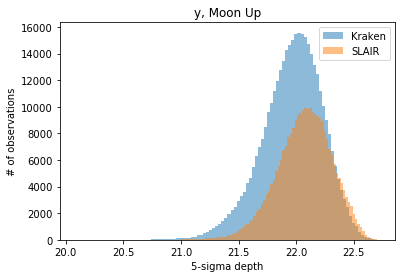

In [7]:
for filtername in ['u', 'g', 'r', 'i', 'z', 'y']:
    plt.figure()
    gk = np.where((krak['filter'] == filtername) & (krak['sunAlt'] < np.radians(-18.)) & (krak['moonAlt'] > 0))
    gs = np.where((slair['filter'] == filtername) & (slair['sunAlt'] < np.radians(-18.))& (slair['moonAlt'] > 0))

    val, bins, patches = plt.hist(krak['fivesigmadepth'][gk], bins=100, alpha=0.5, label='Kraken')
    val, bins, patches =  plt.hist(slair['fivesigmadepth'][gs], bins=100, alpha=0.5, label='SLAIR')
    plt.xlabel('5-sigma depth')
    plt.ylabel('# of observations')
    plt.title('%s, Moon Up' % filtername)
    plt.legend()
    plt.savefig('%s_comp.pdf' % filtername)

In [18]:

import sqlite3 as db
import pandas as pd
con = db.connect('minion_1016_sqlite.db')
minion = pd.read_sql('select * from Summary;', con)


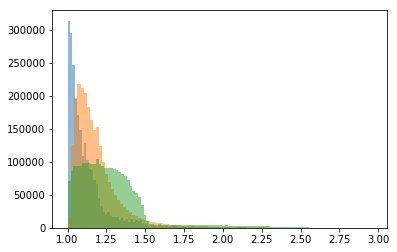

In [19]:
ack = plt.hist(krak['airmass'], bins=100, alpha=0.5)
ack = plt.hist(slair['airmass'], bins=100, alpha=0.5)
ack = plt.hist(minion['airmass'], bins=100, alpha=0.5)


In [20]:
np.median(krak['airmass']), np.median(slair['airmass']), np.median(minion['airmass'])

(1.0752459264158194, 1.1506437273530796, 1.237069)